In [2]:
import numpy as np
import pandas as pd
import pylab as pl
import sklearn as skl
from sklearn import cluster
import scipy as sp

%pylab inline

Populating the interactive namespace from numpy and matplotlib


read the data in https://github.com/fedhere/DSPS/tree/master/HW10

In [0]:
genes = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS/master/HW10/kidpackgenes.csv")

In [0]:
genes.drop(columns = ["Unnamed: 0"], inplace = True )


In [5]:
genes

,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
0,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,0.370241,0.390749,-0.103504,0.100439,-0.375930,0.277828,-0.130996,-0.009923,-0.399163,-0.127337,0.234942,0.628659,0.032232,-0.051522,0.322164,0.677058,0.626976,-0.075533,0.105881,0.121000,0.544208,0.126653,0.214285,0.426416,-0.385641,0.018007,0.407190,-0.175330,-0.033392,-0.056588,0.380069,0.247337,-0.160898,0.362272,0.190525,0.101010,1.280034,-0.137223,0.013790,0.284715,-0.080554,0.077708,0.071853,-0.225874,-0.148424,-0.104276,0.427028,0.331856,0.167732,-0.576949,0.007349,-0.002330,0.168953,-0.122312,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,0.394116,0.474481,-0.004962,0.828600,-0.458895,0.002399,-0.237577,-0.135808,-0.470168,0.088704,-0.039030,0.598749,0.216180,-0.086335,0.509942,0.741002,0.819442,-0.287630,0.253042,-0.122267,0.048518,0.164557,0.208869,0.351322,-0.096956,0.158479,0.566782,-0.171814,0.187912,0.103039,0.605204,-0.010693,0.145773,0.431635,0.408843,0.049612,0.873300,-0.445282,0.050207,0.102510,-0.438553,-0.000697,-0.232677,-0.684507,-0.138210,-0.265029,0.036734,0.474339,0.096666,-0.672424,-0.022295,0.094897,-0.123030,-0.382857,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,0.102853,0.078648,-0.175050,0.064488,-0.243920,-0.036435,-0.815732,-0.094098,-0.786828,-0.497140,-0.211386,0.249518,0.195911,-0.136115,-0.079168,0.461258,0.268629,0.075221,0.447445,-0.380212,-0.127944,-0.514944,0.204084,-0.132934,-0.717559,-0.723766,-0.009187,-0.026201,-0.428314,-0.243215,0.017108,0.199045,0.335860,-0.070557,0.296754,-0.147136,0.479280,-0.445308,0.173236,0.198668,-0.086679,-0.161494,0.043638,-0.115692,-0.020515,-0.035825,0.120870,0.474513,0.061214,-1.124604,0.085298,-0.160597,-0.223782,0.135259,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,0.531540,-0.109510,-0.178851,0.007126,-0.341273,-0.601923,-0.239953,0.307493,-0.264719,-0.105008,0.587365,0.220183,-0.380904,0.073614,0.082134,0.554048,0.300248,0.479317,0.110226,0.060817,0.080991,-0.165642,-0.327310,0.542784,-0.053313,-0.447296,0.701035,0.282916,0.272387,-0.124356,-0.091246,0.121123,-0.091694,0.174790,0.327808,1.024205,0.471022,0.087155,0.398634,-0.053726,0.354639,0.034264,0.684986,0.314253,0.181046,-0.273637,0.234412,0.066505,0.104653,-0.230860,0.074711,0.066029,0.276241,-0.331959,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,0.345860,0.282539,-0.077624,0.826049,-0.136295,-0.686548,-0.580715,0.037365,-0.106896,0.196168,0.201661,0.180436,0.052139,-0.001053,0.152552,0.365342,0.462115,-0.155553,0.239003,-0.231050,0.629987,0.020532,0.063029,-0.981387,-0.280845,-0.164185,0.846567,-0.399580,0.340091,0.044768,0.334025,0.032647,0.466371,-0.118516,0.665676,0.443797,0.474259,-0.349966,0.100411,-0.265844,-0.333114,0.914200,-0.088706,-0.457485,-0.046669,0.171069,0.127423,0.483766,0.607528,-1.412080,-0.281975,0.080899,0.855141,-0.487761,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

# 1. explore the data. 

In [6]:
genes.describe()

,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
count,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000
mean,-0.094115,-0.027780,-0.001672,-0.110167,-0.047817,-0.000598,-0.043284,-0.029803,-0.055334,-0.017651,-0.030229,-0.013706,-0.023663,-0.103121,-0.088098,-0.054139,-0.002876,-0.032372,-0.016909,-0.003809,-0.042458,-0.043939,-0.023220,-0.033933,-0.038683,-0.047783,-0.023156,-0.047930,-0.017811,-0.030018,-0.020926,0.015523,0.005797,-0.071763,-0.013768,-0.020661,0.003889,-0.072878,-0.038951,-0.012304,-0.034749,-0.020242,-0.068896,-0.036699,-0.035138,-0.034969,-0.060241,-0.061428,-0.021173,-0.033599,-0.121057,-0.048510,-0.117854,-0.096178,-0.055508,-0.056013,0.007588,-0.006474,-0.027586,-0.220756,-0.020400,-0.027869,-0.008497,-0.027909,-0.033086,-0.050599,-0.023801,-0.042946,0.020522,-0.051150,0.004469,-0.001898,-0.143864,-0.002374
std,0.502677,0.340808,0.328042,0.692851,0.434918,0.348743,0.377675,0.350009,0.477607,0.353382,0.357349,0.458423,0.548218,0.589297,0.500310,0.546784,0.472823,0.395315,0.395921,0.436902,0.410235,0.445784,0.434078,0.333080,0.478327,0.492953,0.416760,0.475644,0.384636,0.386270,0.409521,0.444773,0.393139,0.624255,0.420408,0.519121,0.442212,0.429390,0.431870,0.528840,0.401199,0.459905,0.502303,0.391871,0.409209,0.443399,0.508753,0.453393,0.386390,0.424501,0.583490,0.405920,0.532086,0.564064,0.398196,0.373763,0.410327,0.432291,0.385475,0.659702,0.351325,0.344451,0.422259,0.429038,0.482347,0.410243,0.327410,0.354847,0.389799,0.401593,0.479766,0.487669,0.532901,0.346003
min,-2.205219,-1.779857,-3.072872,-3.491640,-2.479485,-2.767680,-1.807954,-1.835609,-3.214822,-2.205530,-2.969586,-3.050465,-2.917858,-3.181177,-2.069074,-2.443847,-2.939125,-2.537342,-2.928132,-2.786925,-2.996649,-3.110417,-2.933780,-2.309182,-2.283125,-2.895753,-3.055124,-2.325877,-2.817844,-2.547162,-2.730039,-2.805689,-2.365530,-3.463368,-2.913498,-3.193134,-3.083389,-2.826096,-3.115594,-3.309111,-2.517066,-3.152997,-2.439324,-3.860232,-2.786184,-2.578267,-3.632931,-2.115559,-2.544261,-3.408023,-2.650749,-2.215245,-2.440473,-2.707306,-2.096697,-2.189115,-3.551347,-3.030329,-2.257671,-3.547477,-2.572353,-2.898716,-2.360366,-3.125898,-2.946771,-3.281180,-2.787443,-1.938678,-2.932198,-3.054572,-3.189679,-2.955538,-2.909000,-1.563549
25%,-0.394770,-0.227638,-0.182975,-0.528570,-0.277542,-0.178646,-0.292570,-0.223971,-0.312487,-0.227375,-0.244387,-0.284194,-0.317263,-0.372148,-0.395844,-0.372651,-0.251957,-0.250087,-0.242332,-0.260488,-0.243780,-0.318165,-0.266188,-0.237983,-0.304092,-0.338719,-0.260898,-0.340554,-0.226021,-0.258169,-0.258578,-0.229162,-0.170977,-0.466714,-0.273969,-0.322259,-0.259066,-0.341660,-0.276331,-0.314088,-0.272306,-0.302680,-0.369546,-0.227222,-0.282149,-0.301766,-0.372967,-0.322671,-0.199928,-0.261092,-0.476621,-0.285029,-0.431509,-0.418009,-0.293508,-0.264380,-0.205578,-0.290447,-0.235940,-0.642522,-0.209206,-0.211341,-0.262162,-0.279128,-0.315895,-0.298579,-0.191197,-0.259851,-0.207651,-0.259171,-0.242053,-0.264326,-0.441299,-0.2

In [7]:
genes.shape

(4224, 74)

# 2 preprocess the data
2.1 whiten the data (scale it) with https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html

In [0]:
scaledgenes = skl.preprocessing.scale(genes, axis = 0, with_mean= True, with_std= True, copy = True)

In [9]:
scaledgenes.mean(0).round(2), scaledgenes.std(0)

(array([ 0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0.,  0., -0.,  0.,
        -0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0., -0.,
        -0., -0.,  0.,  0., -0.,  0., -0., -0., -0., -0.,  0., -0.,  0.,
        -0., -0.,  0., -0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0.,  0.,
         0.,  0., -0.,  0.,  0., -0.,  0., -0.,  0.,  0., -0.,  0., -0.,
         0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.]))

2.1 use TSNE to make a projection of the data on an optimal 2D plane using https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [0]:
from sklearn.manifold import TSNE

In [0]:
twodproj = skl.manifold.TSNE(n_components=2, random_state = 0)
twodproj = twodproj.fit_transform(scaledgenes)

In [12]:
twodproj.shape

(4224, 2)

2.3 plot the TSNE projection


Text(0.5, -0.05, 'Figure 1: An arbitrary 2-dimensional projection of the data. The x- and y-axes are mostly meaningless,\n apart from giving some reference as to the relative distance between points.')

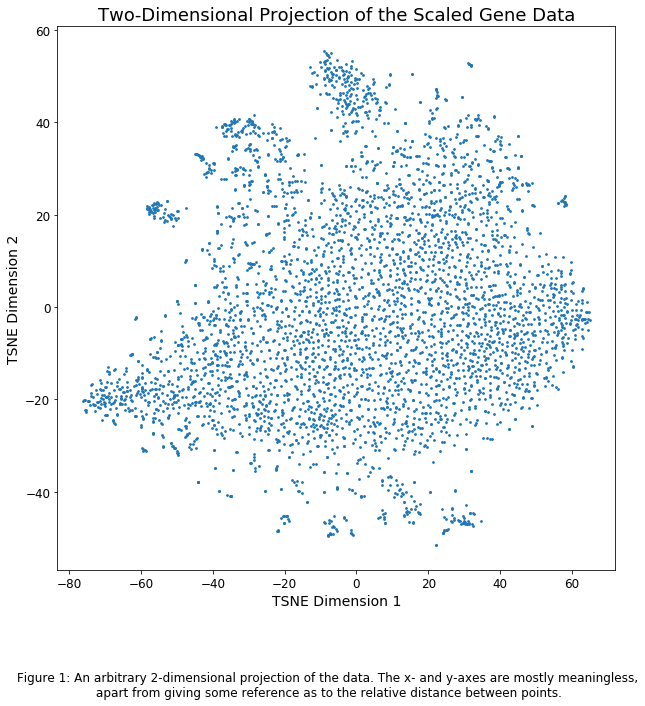

In [53]:
fig,ax = pl.subplots(figsize = (10,10))
pl.plot(twodproj[:,0], twodproj[:,1], '.', markersize=3.5)
pl.title("Two-Dimensional Projection of the Scaled Gene Data", fontsize = 18)
pl.xlabel("TSNE Dimension 1", fontsize = 14)
pl.ylabel("TSNE Dimension 2", fontsize = 14)
for tick in ax.yaxis.get_major_ticks():
  tick.label.set_fontsize(12) 
for tick in ax.xaxis.get_major_ticks():
  tick.label.set_fontsize(12) 
fig1label = "Figure 1: An arbitrary 2-dimensional projection of the data. The x- and y-axes are mostly meaningless,\n apart from giving some reference as to the relative distance between points."
pl.figtext(0.5, -.05, fig1label, ha = 'center', fontsize = 12) 



2.4 calculate a function that measures the intracluster variance (i did it in class)

In [0]:

def calICVar(X, labels):
    icvar = 0
    for n in np.unique(labels):
        #print (n, X[labels == n].std() ** 2)
        icvar += np.sum((X[labels == n] - X[labels == n].mean())**2)
        #X[labels == n].var() 
    print(icvar)
    return icvar


# 3 K-Means clustering
3.1 cluster the data with K-Means using 1 to 10 clusters. Calculate and plot the intracluster variance as a function of number of clusters and look for an "elbow" in the value of the intracluster variance. What is the optimal number of clusters? discuss

312576.00000000006
i.c. variance 312576.0
251076.64173410618
i.c. variance 246707.990797814
231244.09460696898
i.c. variance 224492.29235995107
232166.0233257861
i.c. variance 212932.22663456766
232559.73996336717
i.c. variance 203156.96826989733
226418.80532490098
i.c. variance 196130.823713836
226568.619689753
i.c. variance 190776.60218710257
224676.79153333502
i.c. variance 186488.31596981498
221568.11414292973
i.c. variance 182926.81255921588
221744.11200487538
i.c. variance 179998.31487019887


''

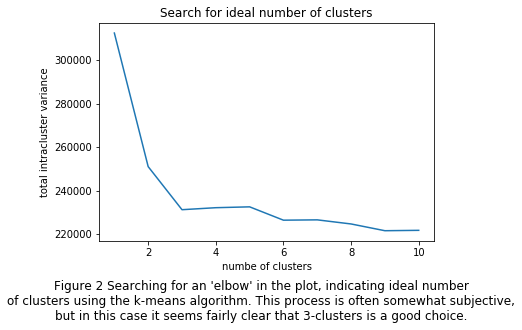

In [58]:
nmaxc = 11
nc = []
for i in range(1, nmaxc):
  c = cluster.k_means(scaledgenes, i)
  nc.append(calICVar(scaledgenes,c[1]))
  print("i.c. variance", c[2])
pl.plot(range(1, nmaxc), nc)
pl.xlabel("numbe of clusters")
pl.ylabel("total intracluster variance")
pl.title("Search for ideal number of clusters")
txt = "Figure 2 Searching for an 'elbow' in the plot, indicating ideal number\n\
of clusters using the k-means algorithm. This process is often somewhat subjective,\n\
but in this case it seems fairly clear that 3-clusters is a good choice."
pl.figtext(0.5, -.15, txt, ha = 'center', fontsize = 12) 
;


3.2 plot the cluster on the 2D TSNE projection colorcoded by clusters

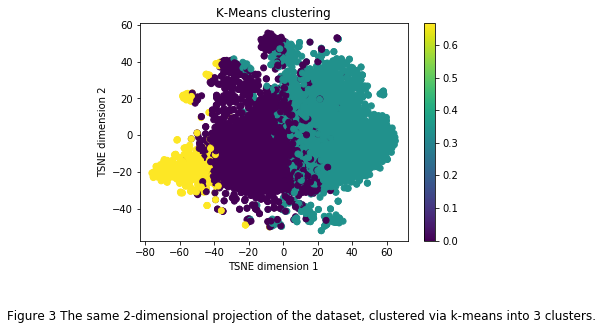

In [60]:
#plots dont need to look exactly like mine
geneclustersKM = cluster.KMeans(n_clusters=3).fit(scaledgenes)
pl.scatter(twodproj[:,0], twodproj[:,1], c=(geneclustersKM.labels_/ geneclustersKM.n_clusters))
pl.colorbar()
pl.title("K-Means clustering")
pl.xlabel("TSNE dimension 1")
pl.ylabel("TSNE dimension 2")
txt = "Figure 3 The same 2-dimensional projection of the dataset, clustered via k-means into 3 clusters."
pl.figtext(0.5, -.15, txt, ha = 'center', fontsize = 12) ;


# Choose to use DBSCAN or hierarchical clustering (EC also to the other method)

# 4a DBSCAN
4a.1 calculate and plot the distance matrix if you have not yet. Discuss: is there structure?

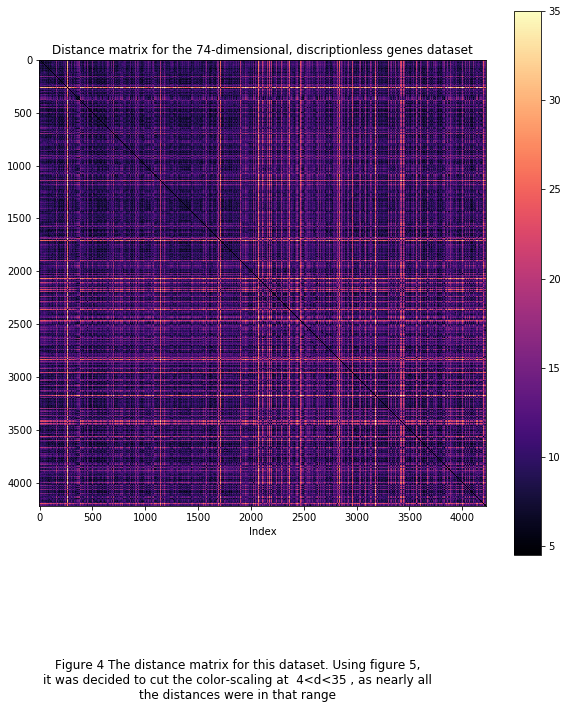

In [66]:
dm = sp.spatial.distance.pdist(scaledgenes)

pl.figure(figsize=(10,10))
pl.imshow(sp.spatial.distance.squareform(dm),cmap='magma', vmax=35,
          vmin=4.5)
pl.colorbar()
pl.title("Distance matrix for the 74-dimensional,\
 discriptionless genes dataset")
pl.xlabel("Index")
txt= "Figure 4 The distance matrix for this dataset. Using figure 5,\n\
it was decided to cut the color-scaling at  4<d<35 , as nearly all\n\
the distances were in that range"
pl.figtext(0.4, -.075, txt, ha = 'center', fontsize = 12) ;

<span style="color:red">**-5 pts: missing the question: is there structure?**</span>

4a.2 make a histogram of the pairwise distances. You should choose a value to initialize dbscan that is just below the mean

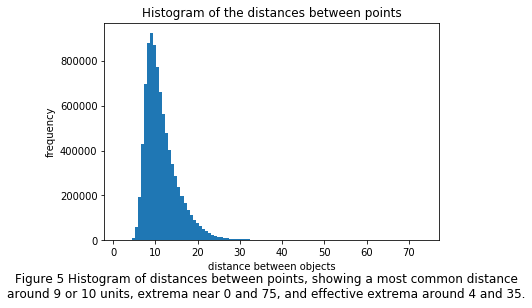

In [67]:
pl.hist(dm, bins=100);
pl.ylabel("frequency")
pl.xlabel("distance between objects")
pl.title("Histogram of the distances between points")
txt = "Figure 5 Histogram of distances between points, showing a most common distance\n\
around 9 or 10 units, extrema near 0 and 75, and effective extrema around 4 and 35."
pl.figtext(0.5, -.075, txt, ha = 'center', fontsize = 12);

4a.3 initialize the dbscan eps value appropriately and fit a dbscan model to the data plot the 2D TSNE projection colorcoded as before. 

4a.4 How many clusters do you have, how many outliers? is that a significant number?

In [19]:
dbs = skl.cluster.DBSCAN(eps = 5.5, min_samples = 20)
dbs.fit(scaledgenes)

DBSCAN(algorithm='auto', eps=5.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=20, n_jobs=None, p=None)

In [20]:

labels = dbs.labels_


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
n_clusters_, n_noise_, len(labels)

(3, 2091, 4224)

Text(0.5, -0.075, 'Figure 6 After what felt to be a very thorough exploration of the hyperparameter space\nthe best breakdown that I could really find was the above, or similar. There was usually either\na very large amount of points classified as noise, or just one very large cluster, and occasionally\na few very small fringe clusters. This plot does show some of the higher dimensionality of the\ndataset, but the high quantity of noise (1934 of 4224) makes this clustering less useful. Cluster\n-1 is noise, and clusters 0-2 are clusters found by the algorithm. This result leads us to\nbelieve that this algorithm is not well suited to clustering this dataset. This may be due to the\nhigh-dimensionality of the dataset (74 dimensions).')

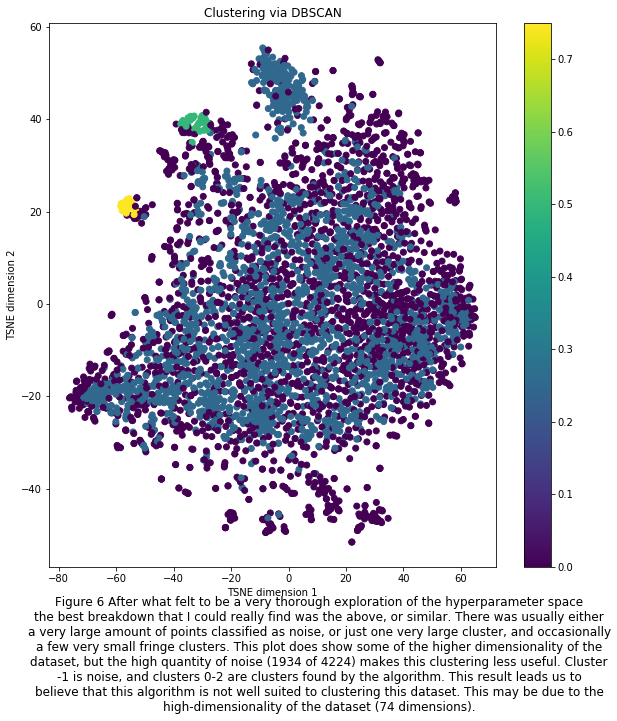

In [78]:

pl.figure(figsize=(10,10))

pl.scatter(twodproj[:,0], twodproj[:,1],  c=(labels + 1) /4)
pl.title("Clustering via DBSCAN")
pl.xlabel("TSNE dimension 1")
pl.ylabel("TSNE dimension 2")
pl.colorbar()
txt = "Figure 6 After what felt to be a very thorough exploration of the hyperparameter space\nthe best breakdown that I could really find was the above, or similar. There was usually either\na very large amount of points classified as noise, or just one very large cluster, and occasionally\na few very small fringe clusters. This plot does show some of the higher dimensionality of the\ndataset, but the high quantity of noise (1934 of 4224) makes this clustering less useful. Cluster\n-1 is noise, and clusters 0-2 are clusters found by the algorithm. This result leads us to\nbelieve that this algorithm is not well suited to clustering this dataset. This may be due to the\nhigh-dimensionality of the dataset (74 dimensions)."
pl.figtext(0.5, -.075, txt, ha = 'center', fontsize = 12)

# 4b Agglomerative clustering
 4b.1 cluster the data with the ward linkage


4b.2 calculate the linkage and plot the dendrogram of the clusters  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html


In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [0]:
sp.cluster.hierarchy.set_link_color_palette(['C9','C8','C6','C1','C7','C3'])

In [0]:
linksgenes = linkage(scaledgenes, method='ward')

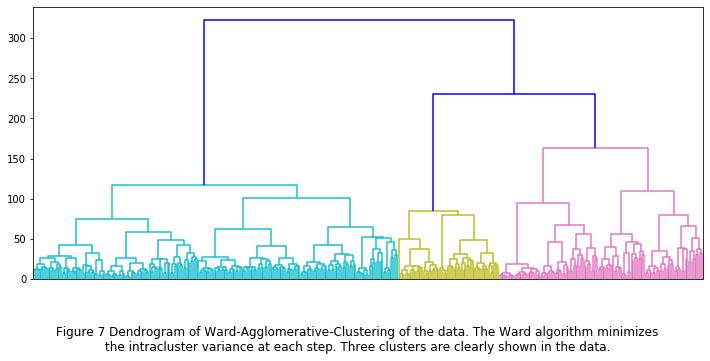

In [79]:
pl.figure(figsize=(12,5))
dendrogram(linksgenes, p=8, truncate_mode='level', no_labels=True)
txt = "Figure 7 Dendrogram of Ward-Agglomerative-Clustering of the data. The Ward algorithm minimizes\nthe intracluster variance at each step. Three clusters are clearly shown in the data."
pl.figtext(0.5, -.075, txt, ha = 'center', fontsize = 12);

4b.3 repeat with a different linkage and comment on differences

In [0]:
linksgenes2 = linkage(scaledgenes, method = 'complete')

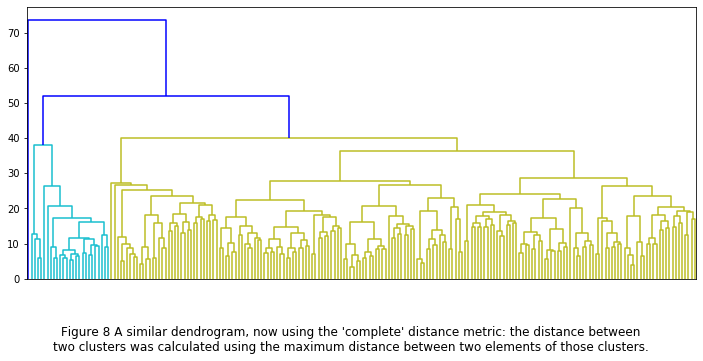

In [80]:
pl.figure(figsize=(12,5))
dendrogram(linksgenes2, p=10, truncate_mode='level', no_labels=True)
txt = "Figure 8 A similar dendrogram, now using the 'complete' distance metric: the distance between\ntwo clusters was calculated using the maximum distance between two elements of those clusters."
pl.figtext(0.5, -.075, txt, ha = 'center', fontsize = 12);

4b.4 rerun agglomerative cluatering to get the "ideal" number of clusters as decided by k-means. plot the 2D TSNE projection colorcoded as before.

In [28]:
skl.cluster.AgglomerativeClustering(n_clusters = 3)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

312576.00000000006
265786.21130934544
240649.59622656365
240557.2366028278
239961.49171955144
235074.38528557075
234083.16084309437
232028.39531397203
228615.8484280025
228470.48992579285


Text(0.5, -0.15, "Figure 9 Searching for an 'elbow' in the plot, indicating ideal number of\nclusters using a Ward-agglomerative-clustering algorithm. Again,in this case it\nseems fairly clear that 3-clusters is a good choice.")

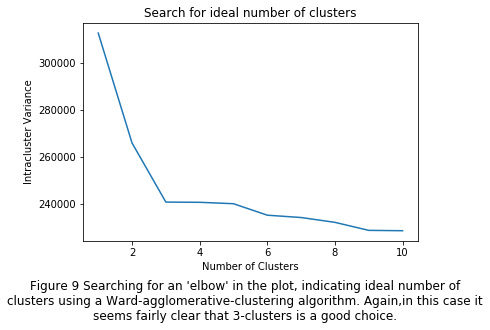

In [84]:
tv_ag = []

np.random.seed(180135)

for i in range(1, 11):
    agger = skl.cluster.AgglomerativeClustering(n_clusters = i).fit(scaledgenes)
    km = agger.labels_
    tv_ag.append(calICVar(scaledgenes, agger.labels_))

pl.plot(range(1,11), tv_ag)
pl.title("Search for ideal number of clusters")
pl.xlabel("Number of Clusters")
pl.ylabel("Intracluster Variance")
txt = "Figure 9 Searching for an 'elbow' in the plot, indicating ideal number of\n\
clusters using a Ward-agglomerative-clustering algorithm. Again,in this case it\n\
seems fairly clear that 3-clusters is a good choice."
pl.figtext(0.5, -.15, txt, ha = 'center', fontsize = 12)

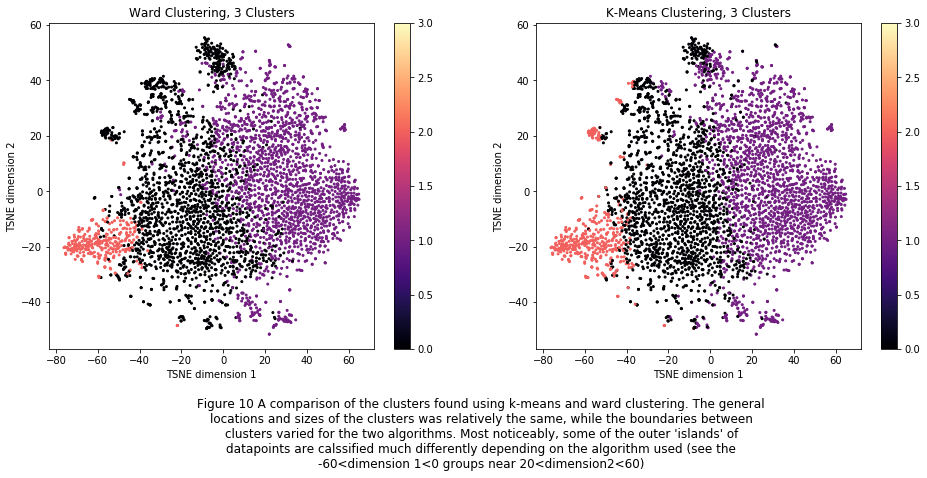

In [89]:
genes_agcluster = skl.cluster.AgglomerativeClustering(n_clusters=3).fit(scaledgenes)

pl.figure(figsize=(16,6))
pl.subplot(121)
sizee = 4
pl.scatter(twodproj[:,0], twodproj[:,1], c=(genes_agcluster.labels_+3)%3,
           s=sizee, cmap='magma', vmax = 3)
pl.title('Agglomerative Clustering, 3 Clusters, \nWard Clustering')
pl.title('Ward Clustering, 3 Clusters')
pl.xlabel("TSNE dimension 1")
pl.ylabel("TSNE dimension 2")
pl.colorbar()
pl.subplot(122)
pl.scatter(twodproj[:,0], twodproj[:,1], c=(geneclustersKM.labels_), s=sizee, cmap='magma', vmax = 3)
pl.title('K-Means Clustering, 3 Clusters')
pl.xlabel("TSNE dimension 1")
pl.ylabel("TSNE dimension 2")

txt = "Figure 10 A comparison of the clusters found using k-means and ward clustering. The general\n\
locations and sizes of the clusters was relatively the same, while the boundaries between\n\
clusters varied for the two algorithms. Most noticeably, some of the outer 'islands' of\n\
datapoints are calssified much differently depending on the algorithm used (see the\n\
-60<dimension 1<0 groups near 20<dimension2<60)"

pl.figtext(0.5, -.15, txt, ha = 'center', fontsize = 12)

pl.colorbar();

# EC, 667: do the other method as well: agglomerative if you used DBSCAn, DBSCAN if you used agglomerative


<span style="color:red">**+10*35/40=8.75 pts: AC score is higher than DBSCAN, so AC as required and DBSCAN as EC**</span>